<a href="https://colab.research.google.com/github/zzh8829/yolov3-tf2/blob/master/colab_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YoloV3 TF2 GPU Colab Notebook

##### 1.  Clone and install dependencies 

**IMPORTANT**: Restart following the instruction

In [13]:
#!git clone https://github.com/zzh8829/yolov3-tf2
%cd /yolov3-tf2/
!pip install -r requirements.txt

[Errno 2] No such file or directory: '/yolov3-tf2/'
/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2
Obtaining file:///Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2 (from -r requirements.txt (line 6))
     |████████████████████████████████| 120.8MB 9.8MB/s eta 0:00:01
     |████████████████████████████████| 51.6MB 878kB/s eta 0:00:012
     |████████████████████████████████| 3.9MB 11.7MB/s eta 0:00:01
     |████████████████████████████████| 450kB 7.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/7b/b8/88def36e74bee9fce511c9519571f4e485e890093ab7442284f4ffaef60b/google_auth_oauthlib-0.4.1-py2.py3-none-any.whl
     |████████████████████████████████| 81kB 11.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/e5/38518af393f7c214357079ce67a317307936896e961e

ERROR: tensorboard 2.1.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.23.0 which is incompatible.
  Found existing installation: tensorboard 2.0.0
    Uninstalling tensorboard-2.0.0:
      Successfully uninstalled tensorboard-2.0.0
  Found existing installation: tensorflow-estimator 2.0.0
    Uninstalling tensorflow-estimator-2.0.0:
      Successfully uninstalled tensorflow-estimator-2.0.0
  Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Running setup.py develop for yolov3-tf2


In [11]:
import os
os.getcwd()

'/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2'

##### 2.  Check Tensorflow2 version

In [14]:
%cd /Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2
!ls

import tensorflow as tf
tf.__version__

/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2
LICENSE              data                 setup.py
README.md            detect.py            tools
checkpoints          detect_video.py      train.py
colab_gpu.ipynb      docs                 yolov3_tf2
conda-cpu.yml        logs                 yolov3_tf2.egg-info
conda-gpu.yml        requirements-gpu.txt
convert.py           requirements.txt


'2.0.0'

##### 3.  Convert Pretrained Darknet Weight

In [15]:
#!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py

2020-03-05 22:02:28.405531: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-05 22:02:28.420403: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feb0493cde0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-05 22:02:28.420420: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
Model: "yolov3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, None,  0                                            
__________________________________________________________________________________________________
yolo_darknet (Model)            ((None, None, None,  40620640    input[0][0]                

I0305 22:02:32.476583 4372319680 utils.py:45] yolo_conv_0/conv2d_54 bn
I0305 22:02:32.481712 4372319680 utils.py:45] yolo_conv_0/conv2d_55 bn
I0305 22:02:32.517838 4372319680 utils.py:45] yolo_conv_0/conv2d_56 bn
I0305 22:02:32.522881 4372319680 utils.py:45] yolo_output_0/conv2d_57 bn
I0305 22:02:32.559494 4372319680 utils.py:45] yolo_output_0/conv2d_58 bias
I0305 22:02:32.563706 4372319680 utils.py:45] yolo_conv_1/conv2d_59 bn
I0305 22:02:32.565950 4372319680 utils.py:45] yolo_conv_1/conv2d_60 bn
I0305 22:02:32.568342 4372319680 utils.py:45] yolo_conv_1/conv2d_61 bn
I0305 22:02:32.577489 4372319680 utils.py:45] yolo_conv_1/conv2d_62 bn
I0305 22:02:32.579683 4372319680 utils.py:45] yolo_conv_1/conv2d_63 bn
I0305 22:02:32.588666 4372319680 utils.py:45] yolo_conv_1/conv2d_64 bn
I0305 22:02:32.590137 4372319680 utils.py:45] yolo_output_1/conv2d_65 bn
I0305 22:02:32.595682 4372319680 utils.py:45] yolo_output_1/conv2d_66 bias
I0305 22:02:32.596773 4372319680 utils.py:45] yolo_conv_2/conv2d_

##### 4. Initialize Detector

In [22]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

''#flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
#flags.DEFINE_string('weights', './checkpoints/yolov3.tf','path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 1, 'number of classes in the model')''''

app._run_init(['yolov3'], app.parse_flags_with_usage)

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

DuplicateFlagError: The flag 'tiny' is defined twice. First from /Users/rajarathnambalakrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, Second from /Users/rajarathnambalakrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py.  Description from first occurrence: yolov3 or yolov3-tiny

##### 4. Detect Image

In [6]:
FLAGS.image = 'data/meme.jpg'

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)
      
yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

I0303 15:48:05.328974 4496395712 <ipython-input-6-b1b93607b63e>:9] weights loaded
I0303 15:48:05.330125 4496395712 <ipython-input-6-b1b93607b63e>:12] classes loaded
I0303 15:48:06.901739 4496395712 <ipython-input-6-b1b93607b63e>:23] time: 1.5175361633300781
I0303 15:48:06.902458 4496395712 <ipython-input-6-b1b93607b63e>:25] detections:


IndexError: list index out of range

##### 5. Training New Dataset

In [5]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar -O ./data/voc2009_raw.tar
!mkdir -p ./data/voc2009_raw
!tar -xf ./data/voc2009_raw.tar -C ./data/voc2009_raw

--2020-02-02 07:42:05--  http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935534080 (892M) [application/x-tar]
Saving to: ‘./data/voc2009_raw.tar’

./data/voc2009_raw. 100%[===================>] 892.19M  12.8MB/s    in 70s     

2020-02-02 07:43:15 (12.8 MB/s) - ‘./data/voc2009_raw.tar’ saved [935534080/935534080]



In [6]:
!python tools/voc2012.py \
  --data_dir './data/voc2009_raw/VOCdevkit/VOC2009' \
  --split train \
  --output_file ./data/voc_train.tfrecord

!python tools/voc2012.py \
  --data_dir './data/voc2009_raw/VOCdevkit/VOC2009' \
  --split val \
  --output_file ./data/voc_val.tfrecord

2020-02-02 07:43:26.544079: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-02-02 07:43:26.544194: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-02-02 07:43:26.544212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
I0202 07:43:27.628061 140379651344256 voc2012.py:92] Class mapping loaded: {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 1

In [16]:
!python tools/visualize_dataset.py --dataset ./data/val.tfrecord --classes=./data/coco.names

I0305 22:03:08.281904 4458225088 visualize_dataset.py:22] classes loaded
2020-03-05 22:03:08.282535: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-05 22:03:08.293671: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ffc8949aa00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-05 22:03:08.293687: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-05 22:03:18.544368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:150] Filling up shuffle buffer (this may take a while): 332 of 512
2020-03-05 22:03:24.495127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:199] Shuffle buffer filled.
I0305 22:03:24.531879 4458225088 visualize_dataset.py:43] labels:
I0305 22:03:24.533535 4458225088 visualize_dataset.py:47] 	pedestrian, 1, [0.6046875  0.6259259  0.634375   

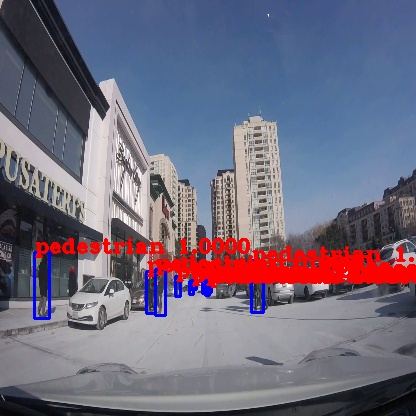

In [17]:
from IPython.display import Image
Image(filename='./output.jpg')

In [18]:
!python train.py \
	--dataset ./data/train.tfrecord \
	--val_dataset ./data/val.tfrecord \
	--classes ./data/coco.names \
	--num_classes 1 \
	--mode fit --transfer darknet \
	--batch_size 8 \
	--epochs 1 \
	--weights ./checkpoints/yolov3.tf \
	--weights_num_classes 80 

2020-03-05 22:04:07.967005: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-05 22:04:07.978705: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9ff0e14e10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-05 22:04:07.978721: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-05 22:04:34.772011: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:150] Filling up shuffle buffer (this may take a while): 429 of 512
2020-03-05 22:04:36.688276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:199] Shuffle buffer filled.
2020-03-05 22:04:39.441847: I tensorflow/core/profiler/lib/profiler_session.cc:225] Profiler session started.
   4639/Unknown - 14019s 3s/step - loss: 39.1634 - yolo_output_0_loss: 0.8280 - yolo_output_1_loss: 5.6268 - yolo_output_2_loss: 22.25962

In [ ]:
# lower learning rate continued training

!python train.py \
	--dataset ./data/train.tfrecord \
	--val_dataset ./data/val.tfrecord \
	--classes ./data/coco.names \
	--num_classes 1 \
	--mode fit --transfer continue_training \
	--batch_size 16 \
	--epochs 1 \
	--learning_rate 1e-4 \
	--weights ./checkpoints/yolov3_train_1.tf \
	--weights_num_classes 80 

2020-03-06 09:49:09.002171: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-06 09:49:09.016377: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fea9e532b20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-06 09:49:09.016394: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-06 09:49:36.138971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:150] Filling up shuffle buffer (this may take a while): 366 of 512
2020-03-06 09:49:39.913525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:199] Shuffle buffer filled.
2020-03-06 09:49:59.049590: I tensorflow/core/profiler/lib/profiler_session.cc:225] Profiler session started.
     27/Unknown - 417s 15s/step - loss: 21.4503 - yolo_output_0_loss: 0.0201 - yolo_output_1_loss: 2.0298 - yolo_output_2_loss: 3.2078

In [30]:
# applying the trained model on a video file.....

!python detect_video.py \
  --classes ./data/coco.names \
  --weights 'checkpoints/yolov3_train_1.tf' \
  --tiny False \
  --num_classes 1 \
  --video ./data/video_0338.mp4 \
  --output ./data/result_video_0338.mp4

2020-03-06 03:56:32.833159: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-06 03:56:32.844458: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff56690b080 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-06 03:56:32.844473: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff5baf1ca90> and <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff5baec25f8>).
W0306 03:56:33.652300 4603469248 base.py:272] Inconsistent references when loading the checkpoint into this object graph. Either the Trackable object references in the Python program have changed in an incompatible way, or the checkpoint was generated in an incompatible program.

T

##### 6. Detect using new weights

I0306 03:55:29.178727 4496395712 <ipython-input-28-a3202e52cee9>:16] weights loaded
I0306 03:55:29.180047 4496395712 <ipython-input-28-a3202e52cee9>:19] classes loaded
I0306 03:55:30.642449 4496395712 <ipython-input-28-a3202e52cee9>:30] time: 1.4256110191345215
I0306 03:55:30.643055 4496395712 <ipython-input-28-a3202e52cee9>:32] detections:
I0306 03:55:30.648099 4496395712 <ipython-input-28-a3202e52cee9>:36] 	pedestrian, 0.9958151578903198, [0.6044895  0.34301192 0.69145685 0.7618635 ]
I0306 03:55:30.652328 4496395712 <ipython-input-28-a3202e52cee9>:36] 	pedestrian, 0.9504358768463135, [0.09319213 0.2641789  0.1549028  0.5640831 ]
I0306 03:55:30.656172 4496395712 <ipython-input-28-a3202e52cee9>:36] 	pedestrian, 0.9200772047042847, [0.14049166 0.25132573 0.2144365  0.6187153 ]
I0306 03:55:30.660834 4496395712 <ipython-input-28-a3202e52cee9>:36] 	pedestrian, 0.8459383249282837, [0.6591144  0.34535778 0.7743885  0.7759228 ]
I0306 03:55:30.664624 4496395712 <ipython-input-28-a3202e52cee9>:

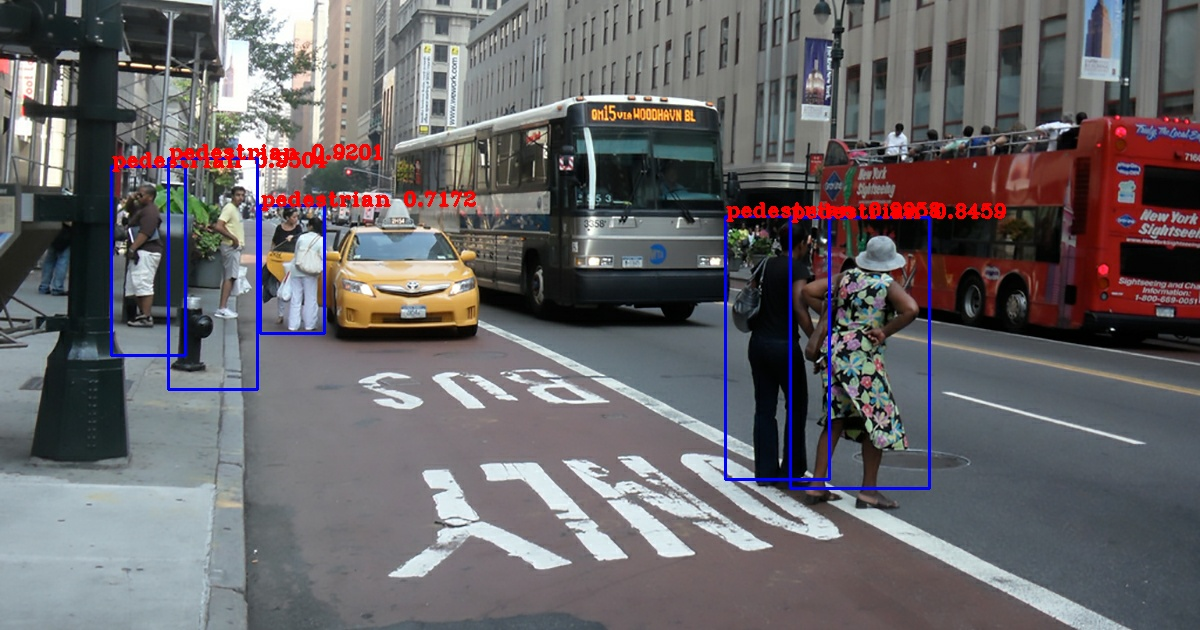

In [28]:
FLAGS.num_classes = 1
FLAGS.classes = 'data/coco.names'
FLAGS.weights = 'checkpoints/yolov3_train_1.tf'
FLAGS.image = 'data/street.jpg'

# Lower threshold due to insufficient training
FLAGS.yolo_iou_threshold = 0.2
FLAGS.yolo_score_threshold = 0.2

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

img_raw = tf.image.decode_image(
    open(FLAGS.image, 'rb').read(), channels=3)

img = tf.expand_dims(img_raw, 0)
img = transform_images(img, FLAGS.size)

t1 = time.time()
boxes, scores, classes, nums = yolo(img)
t2 = time.time()
logging.info('time: {}'.format(t2 - t1))

logging.info('detections:')
for i in range(nums[0]):
    logging.info('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                        np.array(scores[0][i]),
                                        np.array(boxes[0][i])))

img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

from IPython.display import Image, display
display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

In [39]:
#flags.DEFINE_string('video', '/data/video_0338.mp4','path to video file or number for webcam)')
#flags.DEFINE_string('output','/data/result_video_0338.mp4', 'path to output video')
flags.DEFINE_string('output_format', 'XVID', 'codec used in VideoWriter when saving video to file')


In [73]:
# video detection

import cv2

FLAGS.num_classes = 1
FLAGS.classes = 'data/coco.names'
FLAGS.weights = 'checkpoints/yolov3_train_1.tf'
#FLAGS.image = 'data/street.jpg'
FLAGS.video = '/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2/data/video_0338.mp4'
FLAGS.output = '/Users/rajarathnambalakrishnan/Documents/GitHub/yolov3-tf2/data/result.mp4'
FLAGS.output_format = 'mp4v'

# Lower threshold due to insufficient training
FLAGS.yolo_iou_threshold = 0.5
FLAGS.yolo_score_threshold = 0.5

if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

yolo.load_weights(FLAGS.weights).expect_partial()
logging.info('weights loaded')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
logging.info('classes loaded')

times = []

try:
    vid = cv2.VideoCapture(int(FLAGS.video))
except:
    vid = cv2.VideoCapture(FLAGS.video)

out = None

if FLAGS.output:
    # by default VideoCapture returns float instead of int
    width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*FLAGS.output_format)
    out = cv2.VideoWriter(FLAGS.output, codec, fps, (width, height))

while True:
    _, img = vid.read()

    if img is None:
        break
        logging.warning("Empty Frame")
        time.sleep(0.1)
        continue

    img_in = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_in = tf.expand_dims(img_in, 0)
    img_in = transform_images(img_in, FLAGS.size)

    t1 = time.time()
    boxes, scores, classes, nums = yolo.predict(img_in)
    t2 = time.time()
    times.append(t2-t1)
    times = times[-20:]

    img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
    img = cv2.putText(img, "Time: {:.2f}ms".format(sum(times)/len(times)*1000), (0, 30),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
        
    if FLAGS.output:
        out.write(img)
    #cv2.imshow('output', img)
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()



I0306 09:16:01.241354 4496395712 <ipython-input-73-8ac986dd89d8>:23] weights loaded
I0306 09:16:01.243098 4496395712 <ipython-input-73-8ac986dd89d8>:26] classes loaded


'\nimg_raw = tf.image.decode_image(\n    open(FLAGS.image, \'rb\').read(), channels=3)\n\nimg = tf.expand_dims(img_raw, 0)\nimg = transform_images(img, FLAGS.size)\n\nt1 = time.time()\nboxes, scores, classes, nums = yolo(img)\nt2 = time.time()\nlogging.info(\'time: {}\'.format(t2 - t1))\n\nlogging.info(\'detections:\')\nfor i in range(nums[0]):\n    logging.info(\'\t{}, {}, {}\'.format(class_names[int(classes[0][i])],\n                                        np.array(scores[0][i]),\n                                        np.array(boxes[0][i])))\n\nimg = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)\nimg = draw_outputs(img, (boxes, scores, classes, nums), class_names)\n\nfrom IPython.display import Image, display\ndisplay(Image(data=bytes(cv2.imencode(\'.jpg\', img)[1]), width=800))\n\n\n\n    if FLAGS.tiny:\n        yolo = YoloV3Tiny(classes=FLAGS.num_classes)\n    else:\n        yolo = YoloV3(classes=FLAGS.num_classes)\n\n    yolo.load_weights(FLAGS.weights).expect_partial()\n    